# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:
- Email:
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle
import joblib
import os
import warnings


In [2]:
warnings.filterwarnings("ignore")

### Menyiapkan data yang akan diguankan

In [3]:
df = pd.read_csv('/content/data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [6]:
df.duplicated().sum()

0

Dataset ini berisi 4424 entri dengan 37 kolom yang mencakup informasi akademik, sosial, dan ekonomi mahasiswa, seperti status pernikahan, metode pendaftaran, kualifikasi sebelumnya, pekerjaan orang tua, nilai masuk, status beasiswa, jumlah mata kuliah yang diambil, serta faktor ekonomi seperti tingkat pengangguran, inflasi, dan GDP. Semua data lengkap tanpa nilai yang hilang dan duplikad, terdiri dari 29 kolom bertipe integer, 7 float, dan 1 string.

In [7]:
df.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


Dataset ini memiliki beberapa nilai yang hilang di berbagai kolom, dengan total tertinggi pada Admission_grade (620), Curricular_units_1st_sem_grade (805), dan Curricular_units_2nd_sem_grade (786), yang menunjukkan kemungkinan data nilai mahasiswa yang tidak lengkap. Beberapa atribut lain seperti Previous_qualification_grade (101), Fathers_occupation (46), dan Age_at_enrollment (46) juga memiliki jumlah nilai yang hilang yang signifikan. Faktor ekonomi seperti Unemployment_rate, Inflation_rate, dan GDP memiliki sedikit nilai yang hilang (sekitar 9–10). Kolom Status, yang kemungkinan berisi kategori kelulusan mahasiswa, hanya memiliki 3 nilai yang hilang. Data yang hilang ini perlu ditangani.

In [8]:
def descriptive_statistics(df):
    return df.describe(include='all')

descriptive_stats = descriptive_statistics(df)

Fungsi descriptive_statistics(df) digunakan untuk menghitung statistik deskriptif dari seluruh kolom dalam DataFrame, termasuk nilai rata-rata, standar deviasi, nilai minimum dan maksimum untuk data numerik, serta jumlah kategori unik dan nilai yang paling sering muncul untuk data kategorikal. Hasilnya disimpan dalam descriptive_stats, yang berguna untuk memahami distribusi data

<Figure size 1500x800 with 0 Axes>

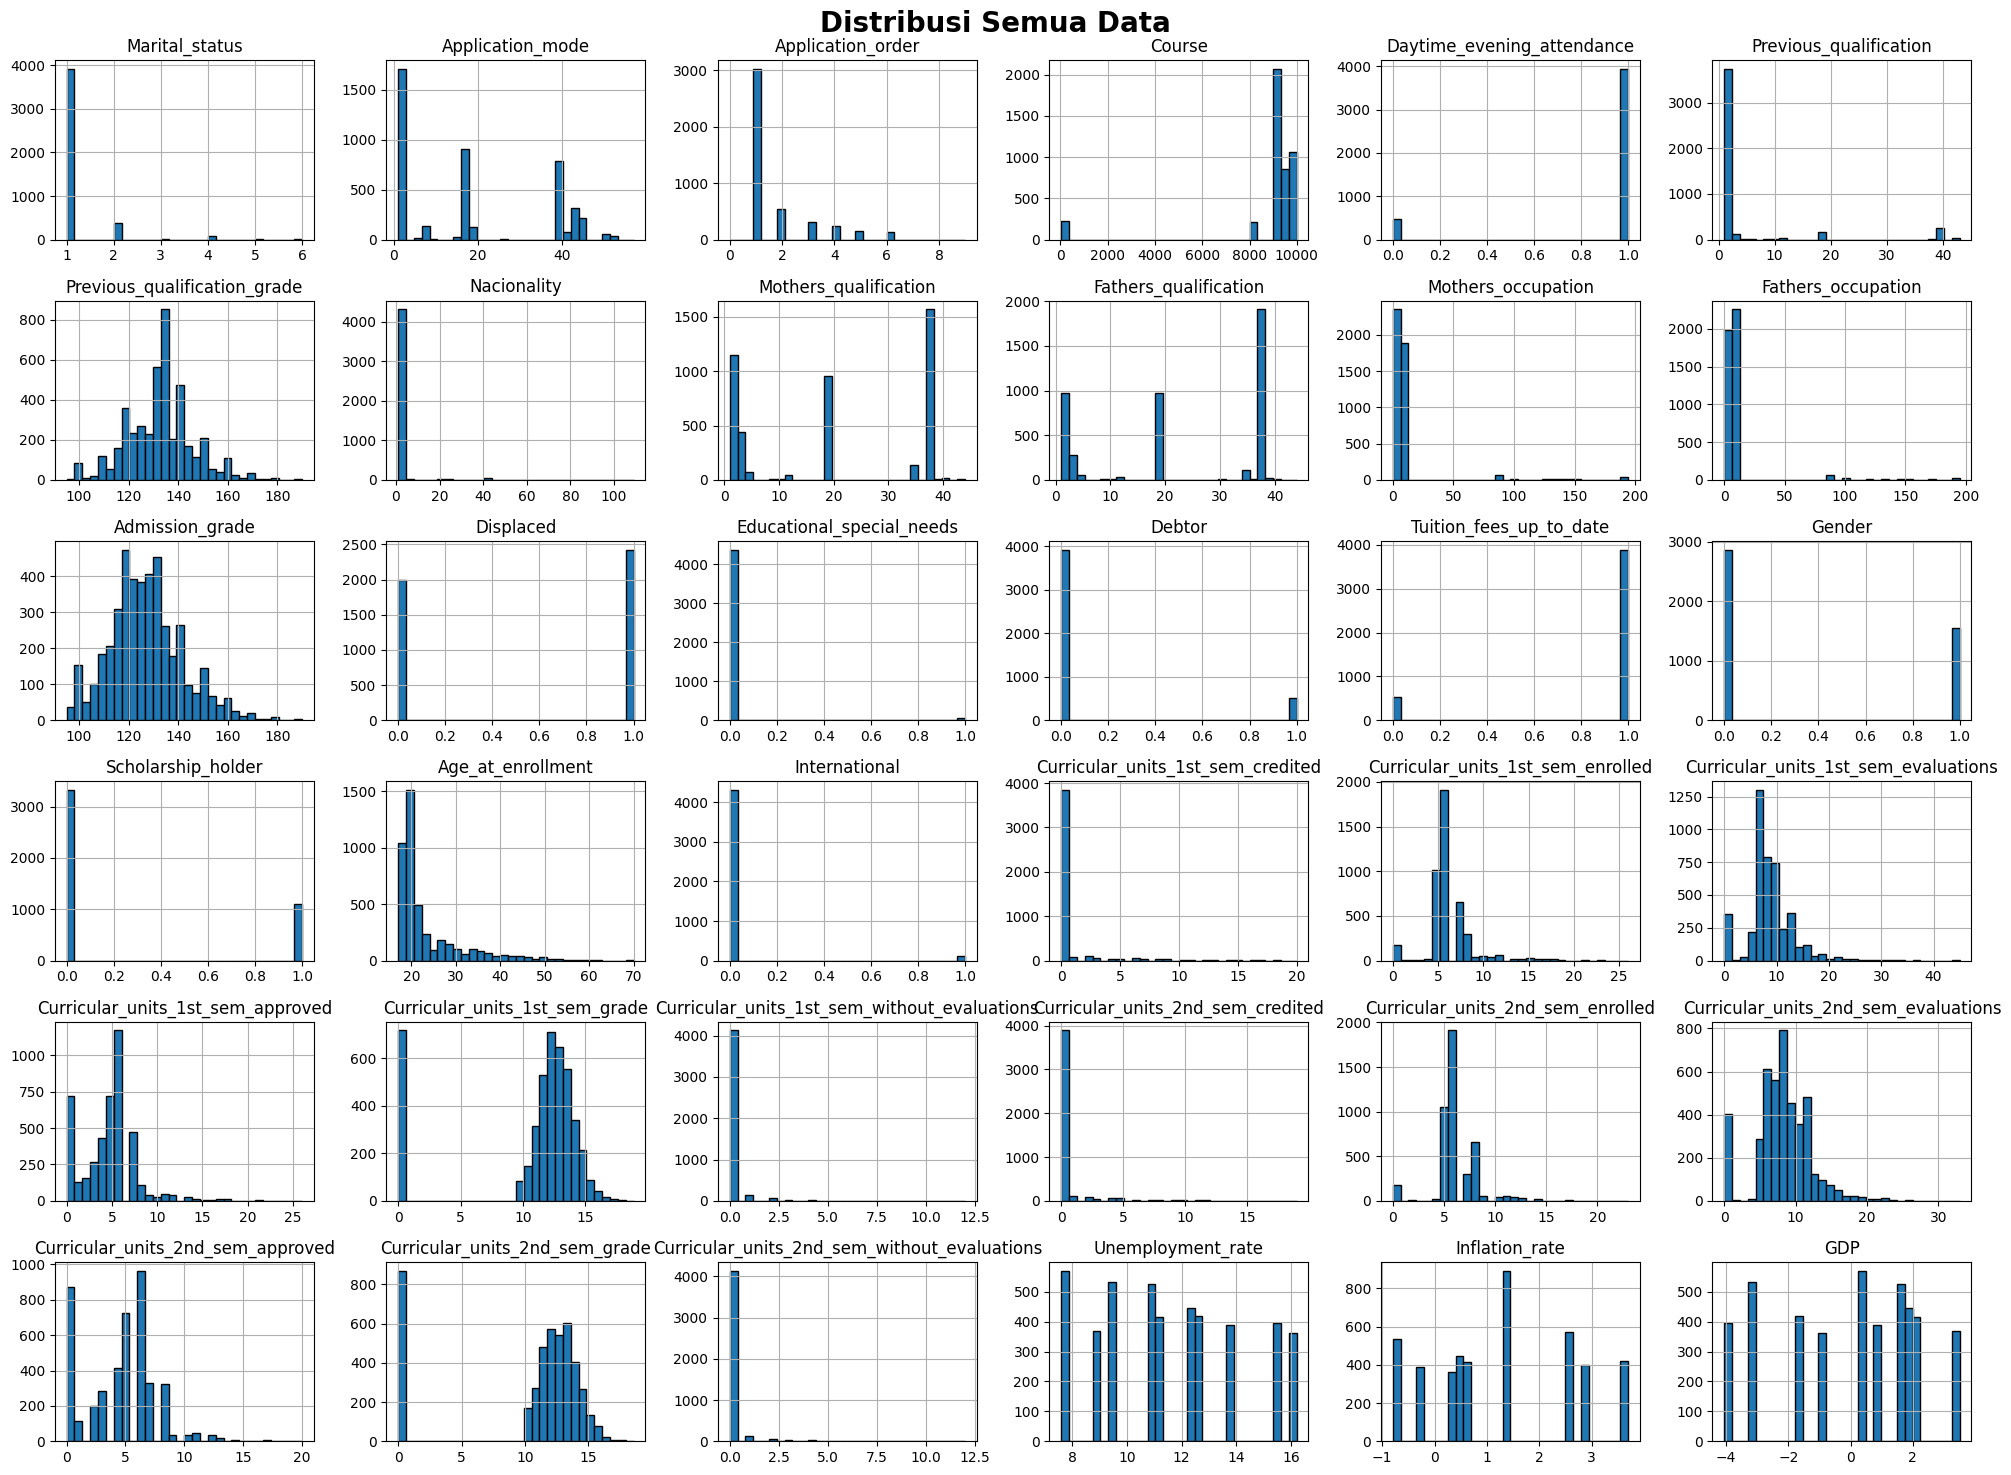

In [9]:
plt.figure(figsize=(15, 8))
df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distribusi Semua Data", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

Gambar ini menampilkan distribusi data untuk setiap fitur dalam dataset menggunakan histogram, menunjukkan berbagai pola seperti distribusi normal pada Admission_grade dan Previous_qualification_grade, serta dominasi kategori tertentu pada fitur biner seperti Displaced dan Debtor. Beberapa fitur memiliki distribusi yang tidak merata, seperti Application_mode dan Course, sementara variabel seperti Age_at_enrollment dan GDP menunjukkan distribusi yang miring. Visualisasi ini membantu dalam memahami karakteristik data, mengidentifikasi outlier, serta melihat ketidakseimbangan kategori sebelum analisis lebih lanjut.

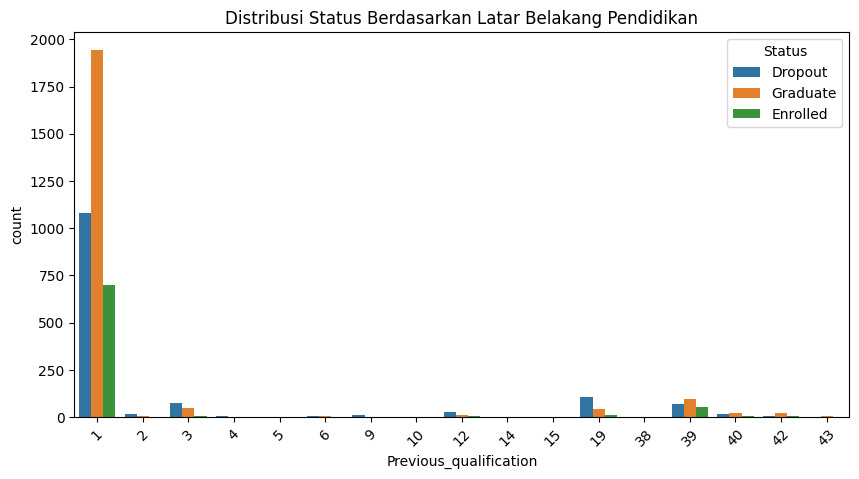

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Previous_qualification', hue='Status', data=df)
plt.title("Distribusi Status Berdasarkan Latar Belakang Pendidikan")
plt.xticks(rotation=45)
plt.show()

Grafik ini menunjukkan distribusi status mahasiswa (Dropout, Graduate, Enrolled) berdasarkan latar belakang pendidikan sebelumnya (Previous_qualification). Mayoritas mahasiswa berasal dari kategori 1, dengan jumlah Graduate paling tinggi, diikuti oleh Dropout dan Enrolled. Beberapa kategori lain memiliki jumlah mahasiswa yang jauh lebih sedikit, menunjukkan bahwa sebagian besar mahasiswa memiliki latar belakang pendidikan yang sama sebelum masuk universitas

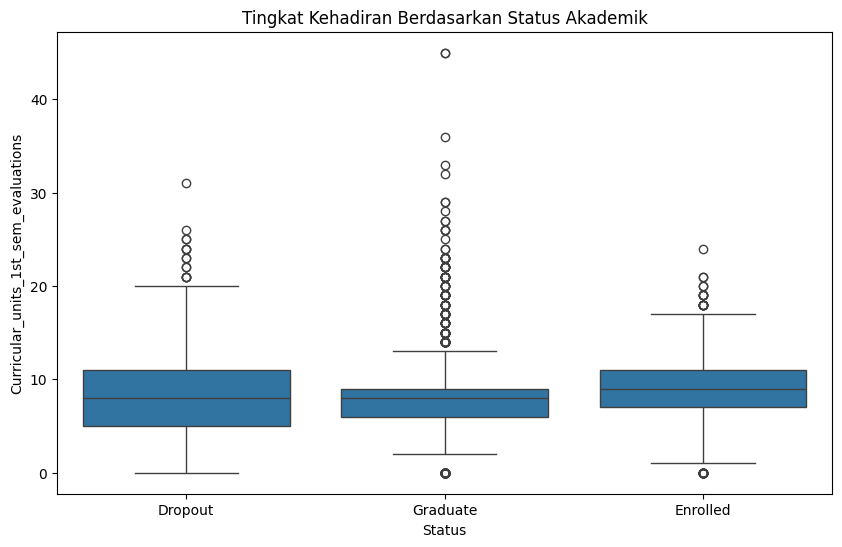

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Curricular_units_1st_sem_evaluations', data=df)
plt.title("Tingkat Kehadiran Berdasarkan Status Akademik")
plt.show()

Boxplot ini menunjukkan distribusi jumlah evaluasi pada semester pertama (Curricular_units_1st_sem_evaluations) berdasarkan status akademik mahasiswa (Dropout, Graduate, Enrolled). Secara umum, nilai median untuk ketiga kelompok relatif serupa, tetapi kelompok Graduate memiliki lebih banyak outlier dengan jumlah evaluasi yang sangat tinggi, menunjukkan adanya beberapa mahasiswa yang mengikuti banyak evaluasi. Kelompok Dropout dan Enrolled juga memiliki distribusi yang cukup luas, tetapi dengan lebih sedikit outlier. Grafik ini membantu memahami pola partisipasi akademik mahasiswa berdasarkan status akademik mereka.

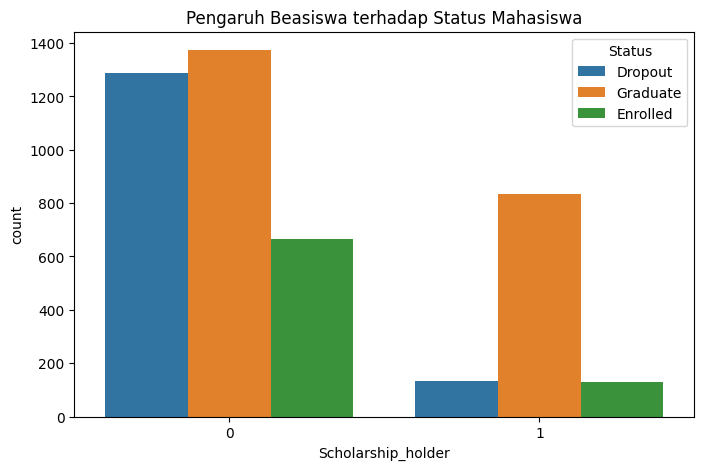

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Scholarship_holder', hue='Status', data=df)
plt.title("Pengaruh Beasiswa terhadap Status Mahasiswa")
plt.show()

Grafik ini menunjukkan distribusi status mahasiswa (Dropout, Graduate, Enrolled) berdasarkan kepemilikan beasiswa (Scholarship_holder). Dari grafik terlihat bahwa mayoritas mahasiswa yang tidak memiliki beasiswa (Scholarship_holder = 0) lebih banyak mengalami dropout dan lulus dibandingkan yang masih terdaftar. Sementara itu, di kelompok penerima beasiswa (Scholarship_holder = 1), jumlah mahasiswa yang lulus lebih tinggi dibandingkan yang dropout atau masih terdaftar. Ini menunjukkan bahwa beasiswa dapat berkontribusi terhadap peningkatan angka kelulusan dan mengurangi kemungkinan mahasiswa mengalami dropout.

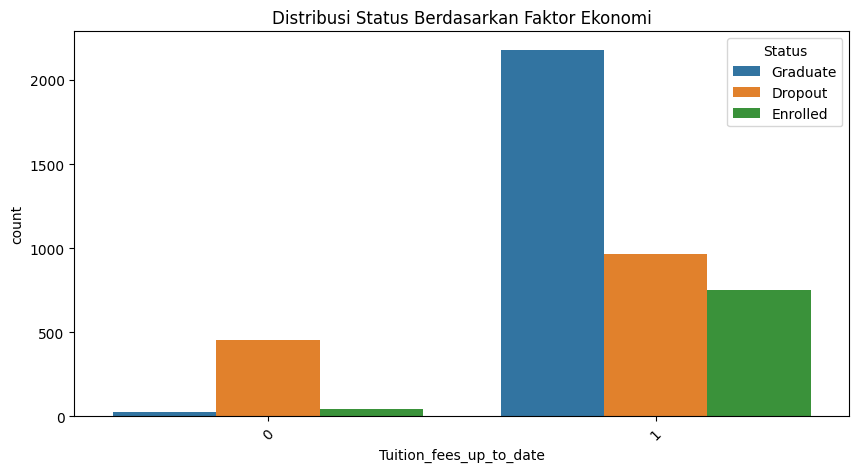

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df)
plt.title("Distribusi Status Berdasarkan Faktor Ekonomi")
plt.xticks(rotation=45)
plt.show()

Grafik ini menunjukkan distribusi status mahasiswa (Graduate, Dropout, Enrolled) berdasarkan faktor ekonomi, yang diwakili oleh variabel Tuition_fees_up_to_date (0 = tidak membayar tepat waktu, 1 = membayar tepat waktu). Terlihat bahwa mayoritas mahasiswa yang membayar biaya kuliah tepat waktu memiliki kemungkinan lebih besar untuk lulus dibandingkan dengan yang mengalami dropout atau masih terdaftar. Sebaliknya, pada kelompok mahasiswa yang tidak membayar tepat waktu, jumlah yang dropout lebih tinggi dibandingkan yang lulus atau masih terdaftar. Hal ini menunjukkan bahwa faktor ekonomi, khususnya kemampuan membayar biaya kuliah tepat waktu, berpengaruh signifikan terhadap kelulusan mahasiswa dan risiko dropout.

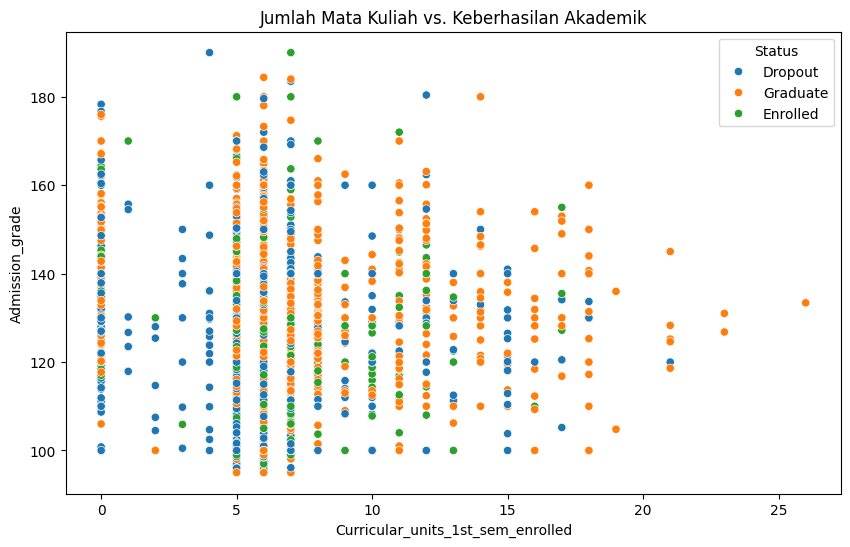

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Curricular_units_1st_sem_enrolled', y='Admission_grade', hue='Status', data=df)
plt.title("Jumlah Mata Kuliah vs. Keberhasilan Akademik")
plt.show()

Grafik ini menunjukkan hubungan antara jumlah mata kuliah yang diambil pada semester pertama dan nilai penerimaan mahasiswa, dengan status akademik yang ditandai oleh warna berbeda (Dropout, Graduate, dan Enrolled). Mahasiswa dengan nilai penerimaan lebih tinggi cenderung lulus, sementara mereka dengan nilai lebih rendah memiliki risiko dropout lebih besar. Selain itu, mahasiswa yang mengambil sedikit mata kuliah (<5) lebih rentan keluar, sedangkan yang mengambil jumlah mata kuliah sedang hingga tinggi (sekitar 10-15) memiliki distribusi lebih bervariasi, dengan peluang kelulusan lebih besar. Secara keseluruhan, kombinasi nilai penerimaan yang tinggi dan jumlah mata kuliah yang cukup berperan penting dalam meningkatkan kemungkinan kelulusan mahasiswa.

## Data Preparation / Preprocessing

In [15]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_imputed.head())

  Marital_status Application_mode Application_order Course  \
0              1               17                 5    171   
1              1               15                 1   9254   
2              1                1                 5   9070   
3              1               17                 2   9773   
4              2               39                 1   8014   

  Daytime_evening_attendance Previous_qualification  \
0                          1                      1   
1                          1                      1   
2                          1                      1   
3                          1                      1   
4                          0                      1   

  Previous_qualification_grade Nacionality Mothers_qualification  \
0                        122.0           1                    19   
1                        160.0           1                     1   
2                        122.0           1                    37   
3                       

Kode tersebut menggunakan SimpleImputer dari sklearn.impute untuk menangani nilai yang hilang dalam DataFrame dengan strategi most_frequent, yaitu mengganti nilai yang hilang dengan nilai yang paling sering muncul dalam setiap kolom. Proses ini dilakukan dengan menerapkan metode fit_transform() pada DataFrame asli (df), kemudian hasilnya dikonversi kembali menjadi DataFrame baru (df_imputed) dengan mempertahankan nama kolom yang sama.

In [16]:
os.makedirs("data", exist_ok=True)
if os.path.exists("data"):
    print("Direktori data berhasil dibuat atau sudah ada.")
else:
    print("Direktori data tidak ada.")
df_imputed.to_csv('data/data_clean.csv', index=False)

Direktori data berhasil dibuat atau sudah ada.


memastikan bahwa direktori sudah ada.

In [17]:
label_encoders = {}
categorical_columns = df_imputed.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df_imputed[col] = le.fit_transform(df_imputed[col])
    label_encoders[col] = le


In [18]:
df_imputed.to_csv('data/data_processed.csv', index=False)

Kode tersebut melakukan Label Encoding pada kolom-kolom kategorikal dalam df_imputed menggunakan LabelEncoder dari sklearn.preprocessing. Pertama, dictionary label_encoders dibuat untuk menyimpan encoder masing-masing kolom. Kemudian, kolom dengan tipe data object (kategorikal) dipilih menggunakan select_dtypes(include=['object']). Selanjutnya, setiap kolom dikonversi ke bentuk numerik menggunakan LabelEncoder, dan hasil encoding langsung disimpan kembali ke df_imputed. Encoder untuk setiap kolom juga disimpan dalam dictionary label_encoders agar dapat digunakan kembali jika diperlukan.

In [19]:
X = df_imputed.drop(columns=['Status'])
y = df_imputed['Status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data X_train: {X_train.shape[0]}")
print(f"Jumlah data X_val: {X_val.shape[0]}")
print(f"Jumlah data y_train: {y_train.shape[0]}")
print(f"Jumlah data y_val: {y_val.shape[0]}")

Jumlah data X_train: 3539
Jumlah data X_val: 885
Jumlah data y_train: 3539
Jumlah data y_val: 885


Kode tersebut membagi dataset df_imputed menjadi fitur (X) dan target (y), di mana kolom 'Status' digunakan sebagai target, sedangkan fitur lainnya digunakan sebagai X. Selanjutnya, data dibagi menjadi training set (80%) dan validation set (20%) menggunakan train_test_split dari sklearn.model_selection, dengan random_state=42 untuk memastikan hasil yang konsisten. Setelah pembagian, jumlah sampel dalam X_train, X_val, y_train, dan y_val ditampilkan untuk memverifikasi ukuran dataset setelah split.









In [20]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("setelah SMOTE:")
print(y_train.value_counts())

setelah SMOTE:
Status
0    1791
1    1791
2    1791
Name: count, dtype: int64


Kode tersebut menerapkan SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani ketidakseimbangan kelas dalam data pelatihan (X_train, y_train). SMOTE bekerja dengan membuat sampel sintetis dari kelas minoritas sehingga distribusi kelas menjadi lebih seimbang. Setelah proses resampling, jumlah sampel dalam setiap kelas dicetak menggunakan value_counts() untuk memastikan bahwa semua kelas memiliki jumlah data yang setara, sehingga model yang dilatih tidak bias terhadap kelas mayoritas.

In [21]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [22]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols)
])

Kode tersebut membuat pipeline pemrosesan untuk fitur numerik dalam X_train. Pertama, num_cols menyimpan daftar kolom numerik dalam dataset. Kemudian, num_pipeline dibentuk dengan dua langkah: SimpleImputer(strategy='median') untuk mengisi nilai yang hilang dengan median dan StandardScaler() untuk menstandarkan data agar memiliki distribusi dengan rata-rata 0 dan standar deviasi 1. Terakhir, ColumnTransformer diterapkan untuk menerapkan pipeline ini hanya pada kolom numerik, memastikan bahwa semua data numerik diproses dengan cara yang konsisten sebelum digunakan dalam model

## Modeling

In [23]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=500, learning_rate=0.05, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'SGD': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
}


Kode tersebut mendefinisikan sebuah dictionary models yang berisi beberapa algoritma klasifikasi untuk dibandingkan dalam eksperimen pembelajaran mesin. Model yang digunakan meliputi Random Forest, yang merupakan ensemble dari pohon keputusan dengan 500 pohon dan kedalaman maksimum 20; Gradient Boosting, yang membangun model secara bertahap dengan 500 estimators dan learning rate 0.05; AdaBoost, yang juga merupakan teknik boosting tetapi dengan pendekatan berbeda; SVM (Support Vector Machine) dengan kernel linear dan opsi probability=True untuk menghasilkan probabilitas prediksi; serta SGDClassifier, yang menggunakan optimasi Stochastic Gradient Descent untuk pembaruan parameter dengan maksimum 1000 iterasi. Setiap model diinisialisasi dengan random_state=42 untuk memastikan reprodusibilitas hasil.

In [24]:
param_grid = {
    'classifier__n_estimators': [300, 500, 700],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}



Kode tersebut mendefinisikan param_grid, yaitu grid parameter yang akan digunakan dalam pencarian hyperparameter tuning untuk model klasifikasi, kemungkinan besar Random Forest atau Gradient Boosting. Parameter yang diuji meliputi n_estimators (jumlah pohon dalam model) dengan nilai (300, 500, 700), max_depth (kedalaman maksimum pohon) dengan nilai (10, 20, 30), dan min_samples_split (jumlah minimum sampel untuk membagi node) dengan nilai (2, 5, 10). Grid ini akan digunakan dalam metode seperti GridSearchCV untuk menemukan kombinasi parameter terbaik.

In [25]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

Kode tersebut membuat pipeline bernama rf_pipeline yang menggabungkan dua tahap utama dalam pemrosesan data dan pelatihan model. Pertama, preprocessor diterapkan untuk menangani preprocessing data, seperti imputasi nilai yang hilang dan normalisasi fitur numerik. Setelah itu, RandomForestClassifier digunakan sebagai model klasifikasi dengan random_state=42 untuk memastikan hasil yang konsisten. Pipeline ini memungkinkan proses preprocessing dan pelatihan model dilakukan secara otomatis dalam satu langkah.

In [26]:
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

Kode tersebut menggunakan GridSearchCV untuk melakukan hyperparameter tuning pada rf_pipeline, yaitu pipeline yang berisi preprocessing dan RandomForestClassifier. param_grid berisi kombinasi parameter yang diuji, dan cv=5 menunjukkan bahwa pencarian dilakukan dengan 5-fold cross-validation menggunakan accuracy sebagai metrik evaluasi. Setelah grid_search.fit(X_train, y_train) dijalankan, model terbaik berdasarkan akurasi disimpan dalam best_rf_model menggunakan grid_search.best_estimator_, yang nantinya dapat digunakan untuk prediksi pada data baru.









In [27]:
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)),
        ('lr', LogisticRegression(max_iter=3000, random_state=42))
    ],
    voting='soft'
)

Kode tersebut membuat model ensemble menggunakan VotingClassifier, yang menggabungkan tiga model berbeda: Random Forest, Gradient Boosting, dan Logistic Regression. Setiap model diberi nama unik dalam parameter estimators. Metode voting yang digunakan adalah 'soft', yang berarti prediksi didasarkan pada probabilitas rata-rata dari masing-masing model, bukan suara mayoritas. Pendekatan ini sering meningkatkan performa dengan menggabungkan kelebihan dari berbagai algoritma untuk menghasilkan prediksi yang lebih akurat dan stabil.

## Evaluation

In [28]:
results = []
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

In [29]:
pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val, average='weighted')
val_recall = recall_score(y_val, y_pred_val, average='weighted')
val_f1 = f1_score(y_val, y_pred_val, average='weighted')

y_pred_train = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy = np.mean(cv_scores)

Kode tersebut mengevaluasi berbagai model dari dictionary models dengan menggunakan pipeline yang mencakup preprocessing dan klasifikasi. Setiap model dilatih pada X_train, y_train, lalu dievaluasi pada X_val menggunakan metrik accuracy, precision, recall, dan F1-score dengan rata-rata tertimbang. Selain itu, dilakukan perhitungan train accuracy untuk melihat performa model pada data pelatihan. Untuk validasi lebih lanjut, digunakan cross-validation (cv=5) pada X_train untuk mendapatkan rata-rata akurasi (cv_accuracy), yang membantu menilai kestabilan model sebelum diterapkan pada data baru.

In [30]:
results.append({
        'Model': model_name,
        'Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy,
        'Cross-Validated Accuracy': cv_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1 Score': val_f1
    })

Kode tersebut menyimpan hasil evaluasi setiap model dalam bentuk dictionary dan menambahkannya ke dalam list results. Setiap dictionary berisi nama model (Model) serta berbagai metrik evaluasi, termasuk train accuracy, validation accuracy, cross-validated accuracy, precision, recall, dan F1 score. Dengan cara ini, semua hasil model dapat dibandingkan secara sistematis untuk memilih model terbaik berdasarkan performanya pada data pelatihan dan validasi.

In [31]:
conf_matrix = confusion_matrix(y_val, y_pred_val)
print(f"Confusion Matrix for {model_name}:\n", conf_matrix)
print(f"Classification Report for {model_name}:\n", classification_report(y_val, y_pred_val))


Confusion Matrix for SGD:
 [[230  53  33]
 [ 47  56  48]
 [ 25  70 323]]
Classification Report for SGD:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       316
           1       0.31      0.37      0.34       151
           2       0.80      0.77      0.79       418

    accuracy                           0.69       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.70      0.69      0.69       885



Hasil evaluasi SGDClassifier menunjukkan akurasi 72%, dengan performa terbaik pada kelas 0 (79% precision, 76% F1-score) dan 2 (81% precision, 81% F1-score), tetapi buruk pada kelas 1 (41% precision, 43% F1-score). Confusion matrix mengindikasikan banyak kesalahan dalam mengklasifikasikan kelas 1, yang sering salah diprediksi sebagai kelas 0 atau 2. Nilai macro average (67%) menunjukkan ketidakseimbangan performa antar kelas, sementara weighted average (73%) lebih tinggi karena kelas 2 mendominasi data. Model ini masih perlu ditingkatkan, terutama dalam membedakan kelas 1 dengan lebih baik.

In [32]:
os.makedirs("models", exist_ok=True)

model_filename_pkl = f'models/{model_name.lower().replace(" ", "_")}_model.pkl'
with open(model_filename_pkl, 'wb') as f:
  pickle.dump(pipeline, f)


Kode tersebut digunakan untuk menyimpan model machine learning dalam bentuk file .pkl (pickle) agar bisa digunakan kembali tanpa harus melatih ulang.

In [33]:
ensemble_model.fit(X_train, y_train)
y_pred_val_ensemble = ensemble_model.predict(X_val)
val_accuracy_ensemble = accuracy_score(y_val, y_pred_val_ensemble)


Kode ini melatih ensemble model menggunakan data pelatihan (X_train, y_train) dan mengevaluasi akurasinya pada data validasi (X_val, y_val). ensemble_model.fit(X_train, y_train) melatih model ensemble yang terdiri dari beberapa classifier (misalnya, Random Forest, Gradient Boosting, dan Logistic Regression). Setelah pelatihan, ensemble_model.predict(X_val) digunakan untuk memprediksi label pada data validasi, yang kemudian dibandingkan dengan label sebenarnya menggunakan accuracy_score(y_val, y_pred_val_ensemble) untuk mengukur akurasi model. Hasilnya menunjukkan seberapa baik model ensemble dapat menggeneralisasi terhadap data baru.

In [34]:
results.append({
    'Model': 'Ensemble Model',
    'Accuracy': accuracy_score(y_train, ensemble_model.predict(X_train)),
    'Validation Accuracy': val_accuracy_ensemble,
    'Cross-Validated Accuracy': np.mean(cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='accuracy')),
    'Precision': precision_score(y_val, y_pred_val_ensemble, average='weighted'),
    'Recall': recall_score(y_val, y_pred_val_ensemble, average='weighted'),
    'F1 Score': f1_score(y_val, y_pred_val_ensemble, average='weighted')
})
results_df = pd.DataFrame(results)
print(results_df)

            Model  Accuracy  Validation Accuracy  Cross-Validated Accuracy  \
0             SGD  0.725851             0.688136                  0.705577   
1  Ensemble Model  0.987530             0.766102                  0.826184   

   Precision    Recall  F1 Score  
0   0.702933  0.688136  0.694870  
1   0.767109  0.766102  0.764901  


Hasil evaluasi menunjukkan bahwa model Ensemble Model memiliki performa yang lebih baik dibandingkan dengan SGD (Stochastic Gradient Descent).

In [35]:
ensemble_model.fit(X_train, y_train)
models['Ensemble Model'] = ensemble_model

best_model = max(results, key=lambda x: x['Validation Accuracy'])['Model']
best_model_filename = f'models/best_model.pkl'
with open(best_model_filename, 'wb') as f:
    pickle.dump(models[best_model], f)

Kode tersebut melatih model ensemble menggunakan data pelatihan (X_train, y_train), kemudian menyimpannya dalam dictionary models dengan nama "Ensemble Model". Setelah itu, model terbaik dipilih berdasarkan akurasi validasi tertinggi dari daftar results. Model terbaik kemudian disimpan dalam file best_model.pkl menggunakan pickle, sehingga dapat digunakan kembali tanpa perlu melatih ulang.

In [36]:
import os

print(os.listdir("models"))
print(os.listdir())

['sgd_model.pkl', 'best_model.pkl']
['.config', 'data.csv', 'data', 'models', 'sample_data']


In [37]:
joblib.dump(preprocessor, "scaler.pkl")
joblib.dump(label_encoders, "encoder.pkl")


['encoder.pkl']